In [12]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# To get the cancer dataset from sklearn (builtin)
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
# Importing the PCA 
from sklearn.decomposition import PCA

%matplotlib inline 

In [3]:
# Create a new variable and call the imported datasets 
cancer = load_breast_cancer()

In [4]:
# To check the keys in the variable 
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# To set the cancer variable to the dataframe 
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [7]:
# to check the head of the data frame 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# It's difficult to predict the high diemension data as it has 30 columns (density of the dataset)

In [ ]:
# Visualising the priciple components using 2D space. Since it has 30 diemensions we can't project the dataset in 3D or 4D graph. 

In [10]:
# To create a standard scalar 
scalar = StandardScaler()

In [11]:
# Fitting the dataframe to the scalar 
scalar.fit(df)

# Transforming the data 
scaled_data = scalar.transform(df)

# Assigning the PCA varaible 

In [14]:
# PCA variable
# n_components is to visualise the ful 30 diemensions as two main components
pca = PCA(n_components=2)

# Fitting the PCA variable 
print(pca.fit(scaled_data))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


# Transforming the data into principle components 

In [15]:
first_component = pca.transform(scaled_data)

In [17]:
# comapare the orginal data shape with another one 
print('Shape of orginal dataset',scaled_data.shape)
print('\n')
print('Shape of First PCA component',first_component.shape)

Shape of orginal dataset (569, 30)


Shape of First PCA component (569, 2)


Text(0, 0.5, 'Second Component')

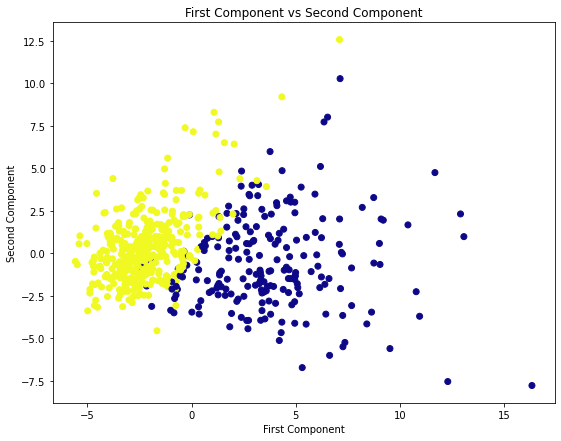

In [20]:
# To visualise the data in scatter plot 
plt.figure(figsize=(9,7))
plt.scatter(first_component[:,0],first_component[:,1],c=cancer['target'],cmap='plasma')
plt.title('First Component vs Second Component')
plt.xlabel('First Component')
plt.ylabel('Second Component')

In [22]:
# To show the assignmets of the components 
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

In [23]:
# To check the newly created dataframe 
# This dataframe is for if the cancer is Malignant or Benign
df_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<AxesSubplot:>

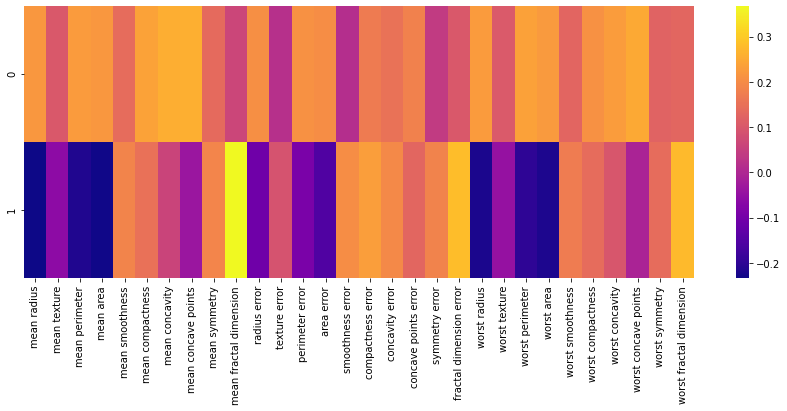

In [31]:
# To visulaise the data 
plt.figure(figsize=(15,5))
sns.heatmap(df_comp,cmap='plasma')